# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,287.620819,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,287.697357,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,281.192230,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,273.367065,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,267.780426,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

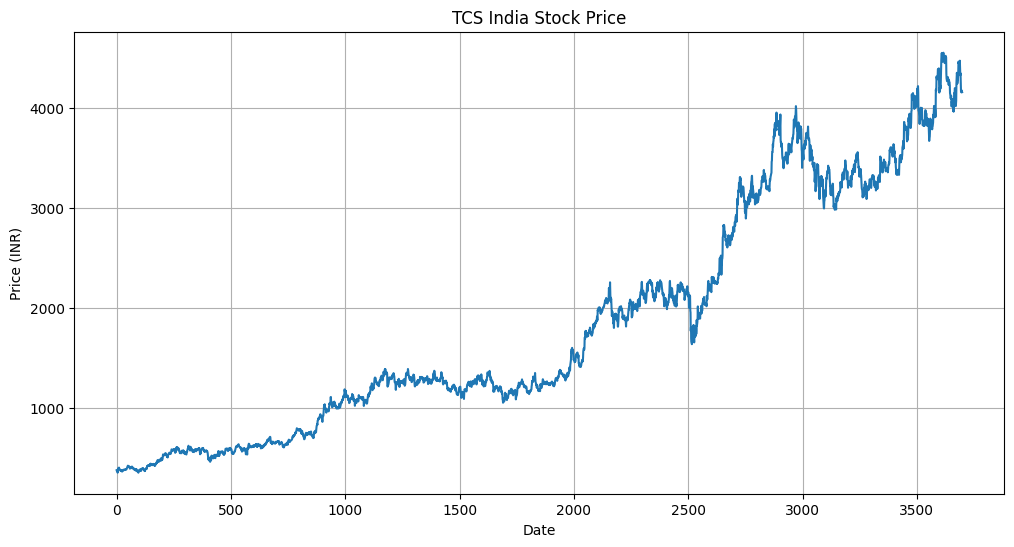

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3694,4158.299805,4217.000000,4114.899902,4200.049805,2195338
3695,4179.500000,4218.000000,4158.299805,4158.299805,1181886
3696,4169.100098,4199.950195,4143.149902,4179.500000,1208464


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3694,4284.658987
3695,4282.600486
3696,4280.320486
3697,4279.138489


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

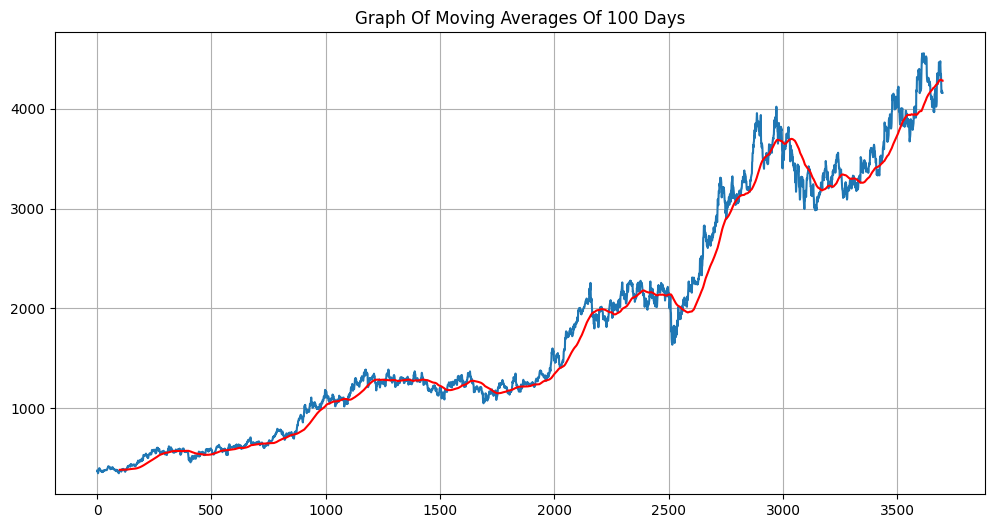

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3694,4123.355994
3695,4123.777993
3696,4124.151743
3697,4124.572494


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

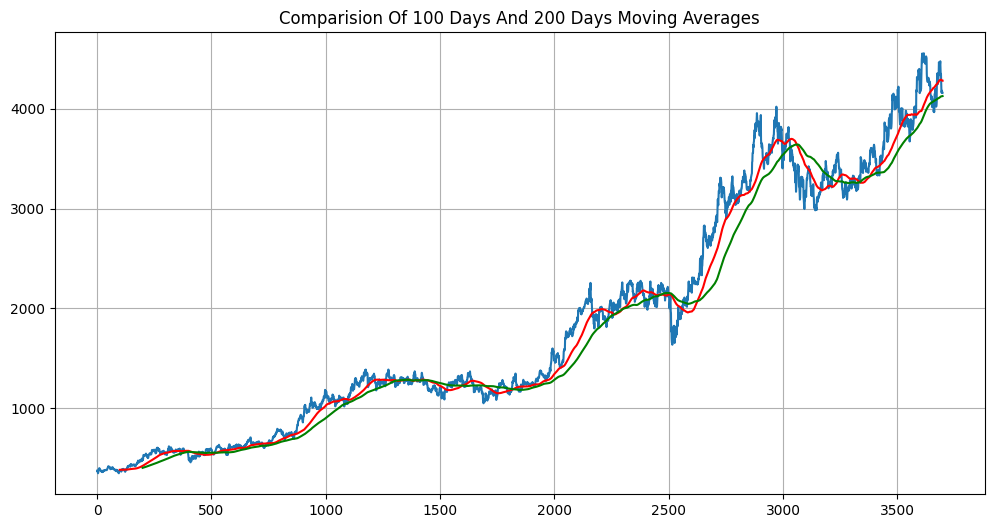

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3699, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2589, 7)
(1110, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,287.620819,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,287.697357,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,281.192230,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,273.367065,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,267.780426,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2589,2020-07-08,2047.628662,2218.899902,2274.399902,2207.600098,2270.00,2793358
2590,2020-07-09,2034.201416,2204.350098,2244.500000,2191.050049,2229.00,3443998
2591,2020-07-10,2050.812256,2222.350098,2249.850098,2176.000000,2205.25,9610320
2592,2020-07-13,2048.643799,2220.000000,2244.949951,2210.000000,2220.00,2963503
2593,2020-07-14,2004.302490,2171.949951,2239.000000,2165.000000,2210.00,2976738


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.95254626],
       [0.97599798],
       [0.99022619]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2489, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 20)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - loss: 0.0052 - mean_absolute_error: 0.0496
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0034 - mean_absolute_error: 0.0405
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0036 - mean_absolute_error: 0.0411
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0034 - mean_absolute_error: 0.0414
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0028 - mean_absolute_error: 0.0371
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0039 - mean_absolute_error: 0.0425
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0031 - mean_absolute_error: 0.0389
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0033 - mean_absolute_error: 0.0394
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0028 - mean_absolute_error: 0.0374
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0034 - mean_absolute_error: 0.0412
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1110, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pafinal_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2119.000000
1,2119.000000
2,2147.600098
3,2150.000000
4,2171.000000


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20391223],
       [0.20391223],
       [0.21342672],
       ...,
       [0.87729333],
       [0.87865733],
       [0.86693059]])

In [ ]:
input_data.shape

(1210, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1110, 100, 1)
(1110,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


In [ ]:
y_pred.shape

(1110, 1)

In [ ]:
y_test

array([0.23338714, 0.22788137, 0.22287462, ..., 0.87729333, 0.87865733,
       0.86693059])

In [ ]:
y_pred

array([[0.21459736],
       [0.21645358],
       [0.2186619 ],
       ...,
       [0.9023832 ],
       [0.8929398 ],
       [0.88414216]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00033267])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

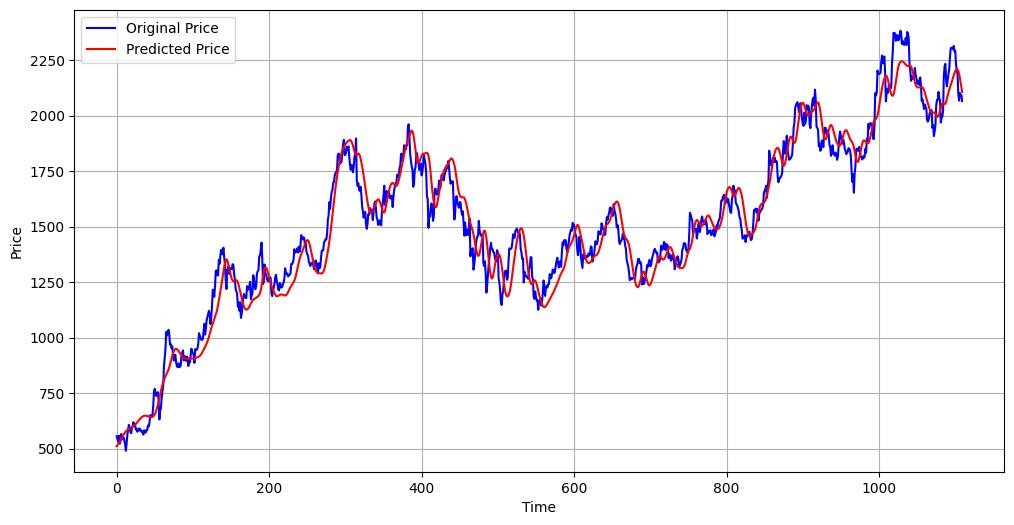

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.53%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9524928023250014


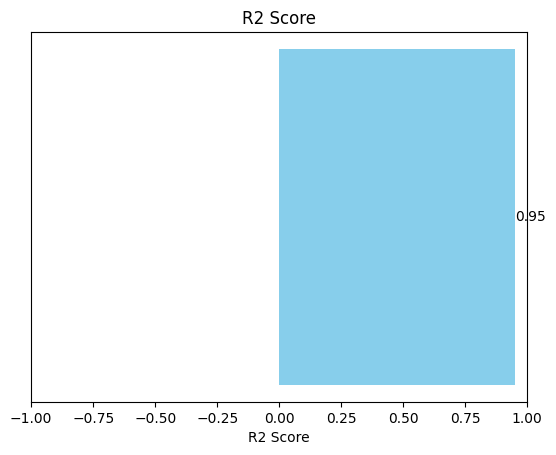

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

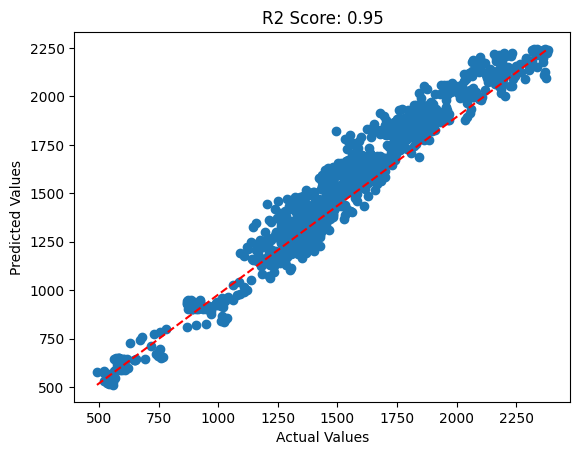

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()